### Question 1

To calculate the probability that patient X actually has Parkinson's disease, we need to use Bayes' theorem.

Defining the events:

- A: patient X has Parkinson's disease
- B: the classifier has detected Parkinson's disease for patient X

We want to calculate P(A|B), which is the probability of patient X having Parkinson's disease.

Bayes' theorem states that:
```
P(A|B) = P(B|A) * P(A) / P(B)
```
where,
- P(B|A) is the probability of the classifier detecting Parkinson's disease given that the patient actually has Parkinson's disease 
- P(A) is the prior probability of a patient having Parkinson's disease (which we know is 0.1 or 10%) 
- P(B) is the probability of the classifier detecting Parkinson's disease (which we need to calculate)
- P(B|not A) is the probability of the classifier detecting Parkinson's disease given that the patient does not have Parkinson's disease (which can be calculated as 1 - classifier accuracy, or 0.1 in this case).

To calculate P(B), we can use the law of total probability:
```
P(B) = P(B|A) * P(A) + P(B|not A) * P(not A)
```
where P(not A) is the probability of a patient not having Parkinson's disease (which is 0.9 or 90%).

Plugging in the values we have:
```
P(A|B) = P(B|A) * P(A) / P(B)

P(A|B) = 0.9 * 0.1 / (0.9 * 0.1 + 0.1 * 0.9)

P(A|B) = 0.5
```
So the probability that patient X actually has Parkinson's disease is 50% even though the given classifier has detectes Parkinson's disease with a 90% accuracy.


### Question 2 - part a

To find the derivative of the sigmoid function, we need to differentiate the function σ(z) with respect to z:

- σ(z) = 1 / (1 + exp(-z))

Using the quotient rule to differentiate:

```
∇zσ(z) = d/dz [1 / (1 + exp(-z))] 
       = [d/dz(1) * (1 + exp(-z)) - 1 * d/dz(1 + exp(-z))]/ (1 + exp(-z))^2
```

We can simplify the denominator by multiplying both the numerator and denominator by exp(z):
```
∇zσ(z) = [0 * (1 + exp(-z)) - (-exp(-z)) * exp(z)] / (1 + exp(-z))^2
∇zσ(z) = exp(-z) / (1 + exp(-z))^2
```
Simplifying the numerator:
```
exp(-z) = 1 / exp(z)
∇zσ(z) = 1 / (exp(z) * (1 + exp(-z))^2)
```
Simplifying the denominator:
```
(1 + exp(-z))^2 = (1 + exp(-z)) * (1 + exp(-z))
(1 + exp(-z)) * (1 + exp(-z)) = 1 + 2exp(-z) + exp(-2z)
```
Substituting this back into the original equation:
```
∇zσ(z) = 1 / (exp(z) * (1 + 2exp(-z) + exp(-2z)))
```

Simplify the above equation using 
- σ(z) = 1 / (1 + exp(-z))

```
∇zσ(z) = σ(z) * (1 - σ(z))
```

This proves that the derivative of the sigmoid function is 
```
∇zσ(z) = σ(z) (1 − σ(z))
```

### Question 2 - part b

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_df = pd.read_csv("titanic.train.csv")
test_df = pd.read_csv("titanic.test.csv")


In [65]:
train_df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          193
sibsp          0
parch          0
ticket         0
fare           1
cabin        702
embarked       1
boat         551
body         809
home.dest    399
dtype: int64

In [68]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_regression(X, w):
    z = np.dot(X, w)
    return sigmoid(z)


In [81]:
# Preprocess the training data to fall between 0 and 1
train_data = train_df.copy()
train_data["age"].fillna(train_df["age"].median(skipna=True), inplace=True)
train_data["fare"].fillna(train_df["fare"].median(skipna=True), inplace=True)
train_data["embarked"].fillna(train_df['embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('cabin', axis=1, inplace=True)
train_data.drop('boat', axis=1, inplace=True)
train_data.drop('body', axis=1, inplace=True)
train_data.drop('home.dest', axis=1, inplace=True)
train_data.drop('name', axis=1, inplace=True)
train_data.drop('ticket', axis=1, inplace=True)
# train_data['travelAlone']=np.where((train_data["sibsp"]+train_data["parch"])>0, 0, 1.0)
# train_data.drop('sibsp', axis=1, inplace=True)
# train_data.drop('parch', axis=1, inplace=True)
train_data['isMinor']=np.where(train_data['age']<=16, 1, 0)
y = train_data["survived"].to_numpy()
train_data.drop('survived', axis=1, inplace=True)
training=pd.get_dummies(train_data, columns=["pclass","embarked","sex"])
training = training.to_numpy()
training

array([[29. ,  0. ,  0. , ...,  1. ,  0. ,  1. ],
       [ 8. ,  1. ,  1. , ...,  1. ,  1. ,  0. ],
       [22. ,  1. ,  0. , ...,  1. ,  1. ,  0. ],
       ...,
       [28. ,  0. ,  0. , ...,  1. ,  0. ,  1. ],
       [38.5,  0. ,  0. , ...,  1. ,  0. ,  1. ],
       [22. ,  0. ,  0. , ...,  0. ,  0. ,  1. ]])

In [82]:
train_data.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
isMinor     0
dtype: int64

In [83]:
# Normalize the data 
mean = np.mean(training, axis=0)
std = np.std(training, axis=0)
X = (training - mean) / std

# Add a column of 1s to X for the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialize the weights
w = np.zeros(X.shape[1])

# Set the learning rate and number of iterations
lr = 0.05
num_iter = 1500
loss_history = []
# Train the model using gradient descent
for i in range(num_iter):
    # Calculate the predicted probabilities
    y_pred = logistic_regression(X, w)
    # Calculate the gradient of the loss function
    gradient = np.dot(X.T, (y_pred - y)) / y.size
    # Update the weights
    w -= lr * gradient
    loss = np.mean(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred))
#         # Append the loss to the history
    loss_history.append(loss)


In [84]:
test_data = test_df.copy()
test_data["age"].fillna(train_df["age"].median(skipna=True), inplace=True)
test_data["fare"].fillna(train_df["fare"].median(skipna=True), inplace=True)
test_data["embarked"].fillna(train_df['embarked'].value_counts().idxmax(), inplace=True)
test_data.drop('cabin', axis=1, inplace=True)
test_data.drop('boat', axis=1, inplace=True)
test_data.drop('body', axis=1, inplace=True)
test_data.drop('home.dest', axis=1, inplace=True)
test_data.drop('name', axis=1, inplace=True)
test_data.drop('ticket', axis=1, inplace=True)
# test_data['travelAlone']=np.where((test_data["sibsp"]+test_data["parch"])>0, 0, 1)
# test_data.drop('sibsp', axis=1, inplace=True)
# test_data.drop('parch', axis=1, inplace=True)
test_data['isMinor']=np.where(test_data['age']<=16, 1, 0)
y_test = test_data["survived"].to_numpy()
test_data.drop('survived', axis=1, inplace=True)
testing=pd.get_dummies(test_data, columns=["pclass","embarked","sex"])
testing = testing.to_numpy()
testing

mean_test = np.mean(testing, axis=0)
std_test = np.std(testing, axis=0)
X_test = (testing - mean_test) / std_test

X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Make predictions on the test data
y_pred_test = np.round(logistic_regression(X_test, w))

accuracy = np.mean(y_pred_test == y_test)
print('Accuracy: %.2f%%' % (accuracy * 100))


Accuracy: 80.62%


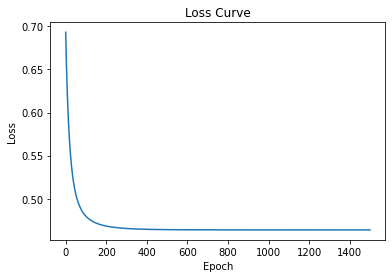

In [85]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

### Question 2 - part c

In [86]:
# Import the necessary libraries
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=X.shape[1]))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, batch_size=32, verbose=0)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
y_pred = np.round(model.predict(X_test))

# Print the results
print('Accuracy: %.2f%%' % (accuracy * 100))



14/14 [==============================] - 0s 2ms/step
Accuracy: 80.14%


### Neural Architecture
```
                     Input Layer
                          |
      |------|-----|------|------|-----|------|---------|
    pclass  sex   age   sibsp  parch  fare embarked  isMinor
     |_________________________________________________|
                \                        /
                 \______________________/
                            |      
                        Dense Layer 
                        (Sigmoid)
                            |
                  Probability of Survival
```